In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms.classifiers import VQC

In [2]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [3]:
# Load the data from 'digits.txt'
with open('shapes.txt', 'r') as f:
    lines = f.readlines()

# Split each line into a list of integers
data = [list(map(int, line.strip().split(','))) for line in lines]

# Separate the features (X) from the labels (y)
X = [line[:-1] for line in data]
y = [line[-1] for line in data]

# Make sure to convert lists to numpy arrays before further processing
X = np.array(X)
y = np.array(y)

print(X.shape)

(150, 8)


In [7]:
vqc = VQC(
    num_qubits=8,
    optimizer=COBYLA(maxiter=1000),
    callback=callback_graph,
    feature_map=ZZFeatureMap(feature_dimension=8, reps=10),
)

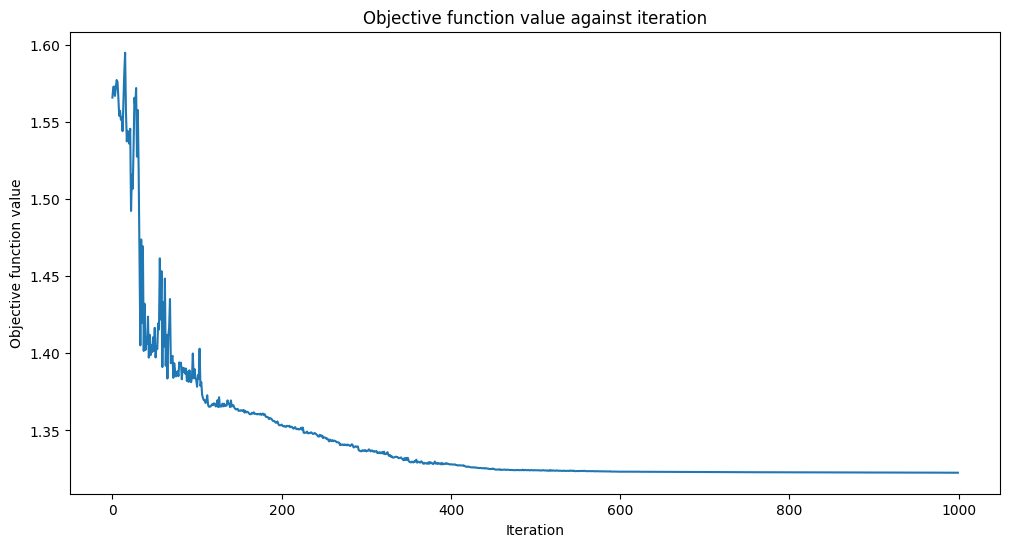

0.8133333333333334

In [8]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y)

In [9]:
vqc.save("vqc.model")

In [10]:
predict = vqc.predict(X)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {y}")

Predicted labels: [0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 2 0 1 0 1 2 1 2 1 0 1 2 0 1 0 2 1 2 1 1 1 1 2 0 2 1
 0 1 1 0 1 0 1 0 1 1 2 2 2 1 2 0 1 1 1 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ground truth:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
